# Sparse Hebbian Learning : testing different rescaling functions

In this notebook, we test the convergence of SparseNet as a function of different parameters tuning the quantization. These parameters only influence 



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 0
N_scan = 7
n_jobs = 7
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, verbose=verbose)
data = shl.get_data()

We will use the ``joblib`` package do distribute this computation on different CPUs.

In [3]:
from joblib import Parallel, delayed
Parallel(n_jobs=n_jobs)(delayed(np.sqrt)(i ** 2) for i in range(10))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

## different rescaling values

In [4]:
import time
time.sleep(3600*0)

In [5]:
!ls -l data_cache

total 830104
-rw-r--r--  1 lolo  staff    5080312 Dec  6 14:25 rescaling - C=0.0_dico.pkl
-rw-r--r--  1 lolo  staff    5079288 Dec  7 06:04 rescaling - C=10.0_dico.pkl
-rw-r--r--  1 lolo  staff    5079288 Dec  6 18:22 rescaling - C=2.5_dico.pkl
-rw-r--r--  1 lolo  staff    5079288 Dec  6 22:25 rescaling - C=5.0_dico.pkl
-rw-r--r--  1 lolo  staff    5079288 Dec  7 02:20 rescaling - C=7.5_dico.pkl
-rw-r--r--  1 lolo  staff    4788991 Dec  7 13:26 rescaling - nb_quant=16_dico.pkl
-rw-r--r--  1 lolo  staff    4830463 Dec  7 17:05 rescaling - nb_quant=32_dico.pkl
-rw-r--r--  1 lolo  staff    4768255 Dec  7 09:47 rescaling - nb_quant=8_dico.pkl
-rw-r--r--  1 lolo  staff  212336720 Dec  6 12:38 vanilla_coding.npy
-rw-r--r--  1 lolo  staff  167772240 Dec  6 08:50 vanilla_data.npy
-rw-r--r--  1 lolo  staff    5079233 Dec  6 12:36 vanilla_dico.pkl


In [6]:
!rm -fr data_cache/rescaling*lock* 
#!rm -fr "data_cache/rescaling - C=0.0_dico.pkl" 
#!rm -fr data_cache/rescaling*

In [7]:
!ls -l data_cache

total 830104
-rw-r--r--  1 lolo  staff    5080312 Dec  6 14:25 rescaling - C=0.0_dico.pkl
-rw-r--r--  1 lolo  staff    5079288 Dec  7 06:04 rescaling - C=10.0_dico.pkl
-rw-r--r--  1 lolo  staff    5079288 Dec  6 18:22 rescaling - C=2.5_dico.pkl
-rw-r--r--  1 lolo  staff    5079288 Dec  6 22:25 rescaling - C=5.0_dico.pkl
-rw-r--r--  1 lolo  staff    5079288 Dec  7 02:20 rescaling - C=7.5_dico.pkl
-rw-r--r--  1 lolo  staff    4788991 Dec  7 13:26 rescaling - nb_quant=16_dico.pkl
-rw-r--r--  1 lolo  staff    4830463 Dec  7 17:05 rescaling - nb_quant=32_dico.pkl
-rw-r--r--  1 lolo  staff    4768255 Dec  7 09:47 rescaling - nb_quant=8_dico.pkl
-rw-r--r--  1 lolo  staff  212336720 Dec  6 12:38 vanilla_coding.npy
-rw-r--r--  1 lolo  staff  167772240 Dec  6 08:50 vanilla_data.npy
-rw-r--r--  1 lolo  staff    5079233 Dec  6 12:36 vanilla_dico.pkl


[Parallel(n_jobs=7)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.4s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:    2.5s remaining:    1.6s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:    2.9s finished


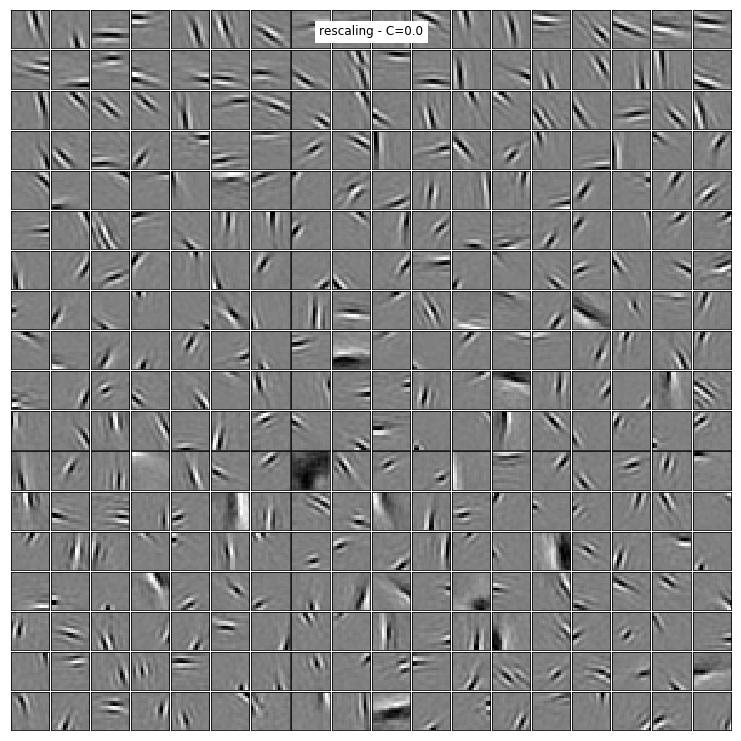

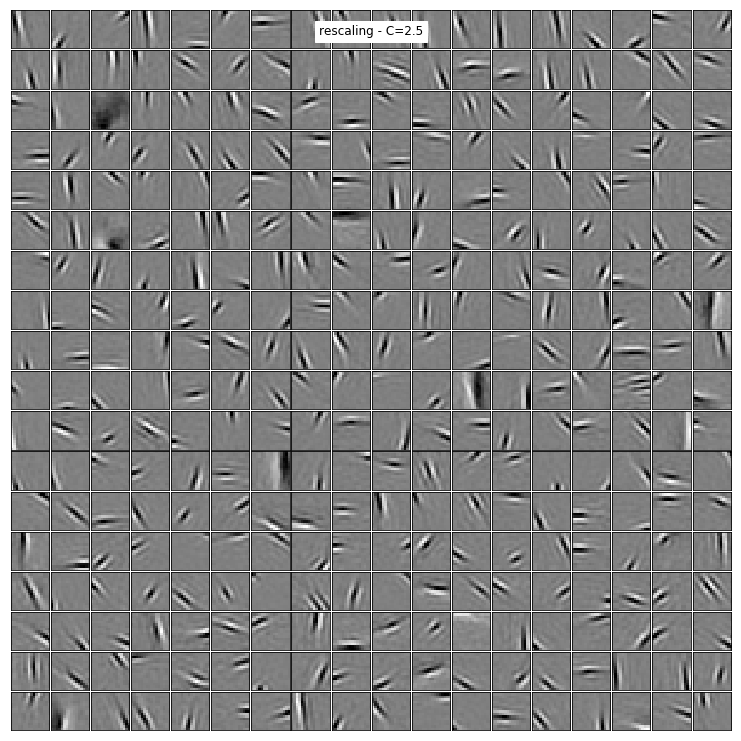

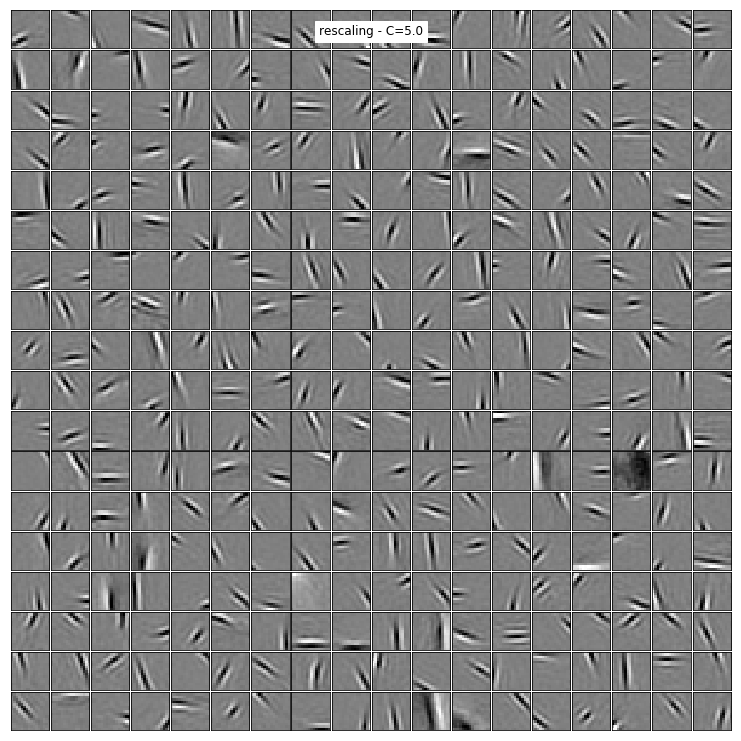

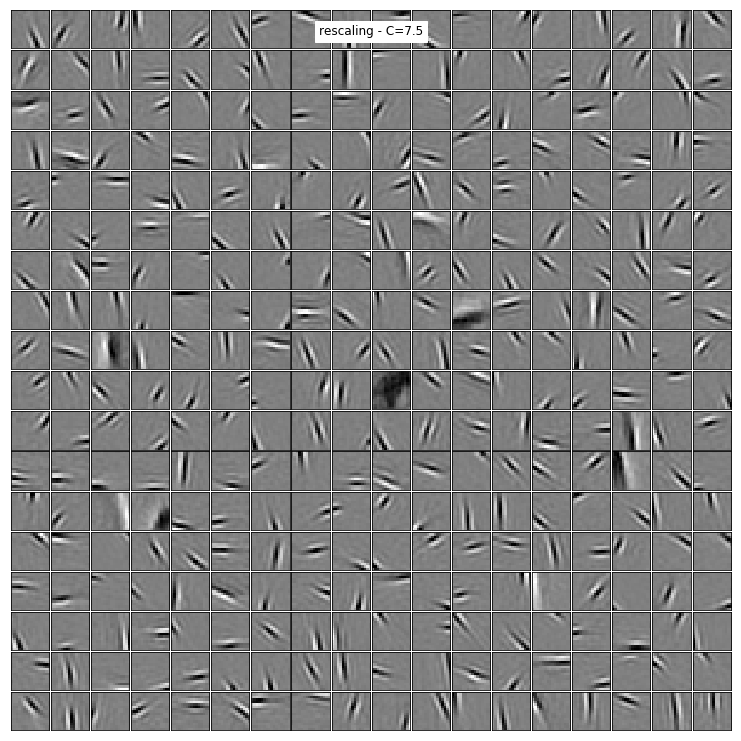

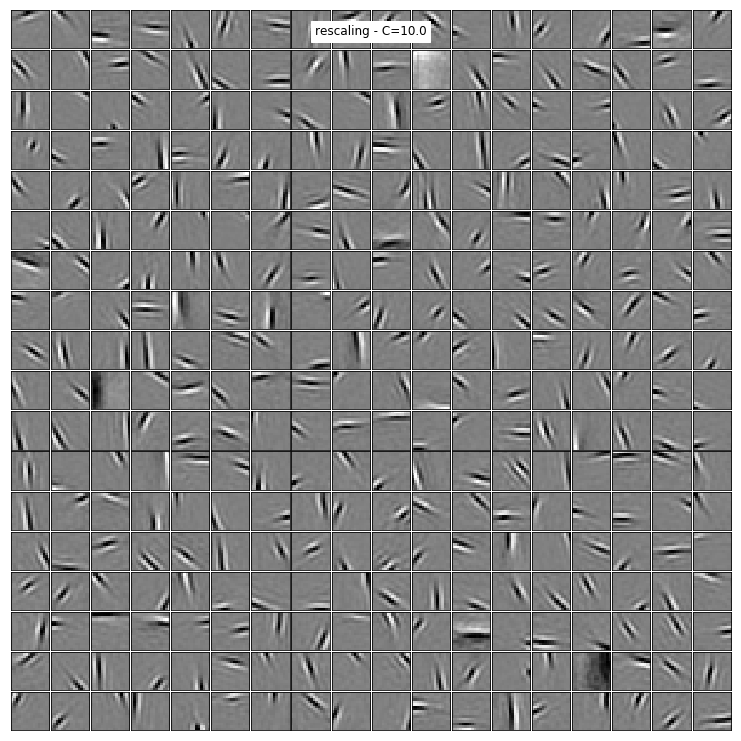

In [8]:
from joblib import Parallel, delayed

def run(C, list_figures, data):
    matname = 'rescaling - C={}'.format(C)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              C=C, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    return dico


Cs = np.linspace(0, 10, 5)
if not n_jobs==1: out = Parallel(n_jobs=n_jobs, verbose=15)(delayed(run)(C, [], data) for C in Cs)

for C in Cs:
    dico = run(C, list_figures=list_figures, data=data)
    plt.show()

## different quantization parameters

In [ ]:
2 ** np.arange(3, 9)

array([  8,  16,  32,  64, 128, 256])

with a fixed $C=5.$

In [ ]:
from joblib import Parallel, delayed
def run(nb_quant, list_figures, data):
    matname = 'rescaling - nb_quant={}'.format(nb_quant)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              C=5., nb_quant=nb_quant, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    return dico

nb_quants = 2 ** np.arange(3, 9)
if not n_jobs==1: out = Parallel(n_jobs=n_jobs, verbose=15)(delayed(run)(int(nb_quant), [], data) for nb_quant in  nb_quants)

for nb_quant in  nb_quants:
    dico = run(nb_quant, list_figures, data)
    plt.show()

[Parallel(n_jobs=7)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=7)]: Done   2 out of   6 | elapsed:    1.8s remaining:    3.6s
[Parallel(n_jobs=7)]: Done   3 out of   6 | elapsed:    2.0s remaining:    2.0s


with an adaptive rescaling function ($C=0.$)

In [ ]:
from joblib import Parallel, delayed
def run(nb_quant, list_figures, data):
    matname = 'rescaling - auto - nb_quant={}'.format(nb_quant)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              C=0., nb_quant=nb_quant, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)
    return dico

nb_quants = 2 ** np.arange(3, 9)
if not n_jobs==1: out = Parallel(n_jobs=n_jobs, verbose=15)(delayed(run)(int(nb_quant), [], data) for nb_quant in  nb_quants)

for nb_quant in  nb_quants:
    dico = run(nb_quant, list_figures, data)
    plt.show()

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts